# hash_init16 与相似度搜索算法

In [5]:
import pandas as pd
from int16hash import int16hash, search_hash_by_hamming, search_hash

In [6]:
fp_hashes = pd.read_csv('dataset_hash_int16.csv')

In [3]:
fp_hash = int16hash('images/train/餐厅_北欧极简/605633_2670717.jpg')

In [4]:
res_df1 = search_hash_by_hamming(fp_hashes, fp_hash[1])

search_hash_by_hamming cost time: 0.39920759201049805 s


In [5]:
res_df2 = search_hash(fp_hashes, fp_hash[1])

search_hash cost time: 0.013962745666503906 s


In [7]:
res_df2.head()

,path,type,style,hash_short,hash_int16
5097,images/train/书房_美式经典/1481415_7957426.jpg,书房,美式经典,fd90,64912
8118,images/train/儿童房_美式经典/537567_2242600.jpg,儿童房,美式经典,fd90,64912
8148,images/train/儿童房_美式经典/551122_2333132.jpg,儿童房,美式经典,fd90,64912
8172,images/train/儿童房_美式经典/582301_2530376.jpg,儿童房,美式经典,fd90,64912
8298,images/train/儿童房_美式经典/993498_5071469.jpg,儿童房,美式经典,fd90,64912


In [8]:
df = pd.read_csv('dataset_with_fp_long.csv')

In [11]:
search_target = df.loc[res_df2.index]

In [23]:
from imgfeature import ImSim
import numpy as np
from time import time

imsim = ImSim(k=50)

def fp2des(fp):
    kp_num = int(len(fp) / (64))
    ut8arr = np.array([int(fp[i:i+2], 16) for i in range(0, len(fp), 2)], dtype=np.uint8)
    return ut8arr.reshape(kp_num, 32)

def sim_query(df, img_path):
    des = imsim.getFeature(img_path)[1]
    rows = list()

    start = time()
    for fp, i in zip(df['fp_long'], df.index):
        sim = imsim.calcSim(fp2des(fp), des)
        if sim > 0.0001:
            rows.append((i, sim))
    print('sim_query cost time: {} s'.format(time() - start))
    return rows

In [25]:
search_res = sim_query(search_target, 'images/train/餐厅_北欧极简/605633_2670717.jpg')

sim_query cost time: 0.041521549224853516 s


In [28]:
list(zip(*search_res))

[(63441, 97943, 99170, 99834, 99960, 100000, 104624, 108677, 109338),
 (0.3, 0.24, 0.3, 0.22, 0.28, 0.38, 0.28, 0.3, 0.3)]

In [35]:
search_res = sorted(search_res, key=lambda x:x[1], reverse=True)

[(search_target.loc[item[0]].path, item[1]) for item in search_res]

[('images/train/餐厅_北欧极简/605633_2670717.jpg', 0.38),
 ('images/train/客厅_北欧极简/804814_3897668.jpg', 0.3),
 ('images/train/餐厅_北欧极简/522018_2153111.jpg', 0.3),
 ('images/train/餐厅_现代简约/580096_2515131.jpg', 0.3),
 ('images/train/餐厅_现代简约/615001_2725105.jpg', 0.3),
 ('images/train/餐厅_北欧极简/601830_2649315.jpg', 0.28),
 ('images/train/餐厅_现代简约/1130562_5927347.jpg', 0.28),
 ('images/train/餐厅_北欧极简/1096774_5725878.jpg', 0.24),
 ('images/train/餐厅_北欧极简/594735_2608294.jpg', 0.22)]

In [36]:
from pimquery import PImQuery

In [37]:
piq = PImQuery('dataset_hash_int16.csv', 'dataset_with_fp_long.csv')

In [51]:
start = time()
sim_res  =piq.query('images/train/餐厅_美式经典/996237_5087393.jpg')
print('total cost time: {} s'.format(time() - start))

search_hash cost time: 0.01296234130859375 s
query cost time: 0.015620946884155273 s
total cost time: 0.065765380859375 s


In [52]:
sim_res

[('images/train/餐厅_美式经典/575828_2488250.jpg', 0.36),
 ('images/train/餐厅_美式经典/607212_2680753.jpg', 0.36),
 ('images/train/餐厅_美式经典/1279634_6771858.jpg', 0.34),
 ('images/train/餐厅_美式经典/495796_1991251.jpg', 0.34),
 ('images/train/餐厅_美式经典/742822_3518662.jpg', 0.34),
 ('images/train/餐厅_美式经典/996237_5087393.jpg', 0.34),
 ('images/train/餐厅_美式经典/924944_4645684.jpg', 0.3)]

In [48]:
dataset.tail()

,path,type,style
113886,images/train/餐厅_美式经典/995746_5084211.jpg,餐厅,美式经典
113887,images/train/餐厅_美式经典/996069_5086370.jpg,餐厅,美式经典
113888,images/train/餐厅_美式经典/996069_5086377.jpg,餐厅,美式经典
113889,images/train/餐厅_美式经典/996237_5087392.jpg,餐厅,美式经典
113890,images/train/餐厅_美式经典/996237_5087393.jpg,餐厅,美式经典


In [55]:
from PIL import Image

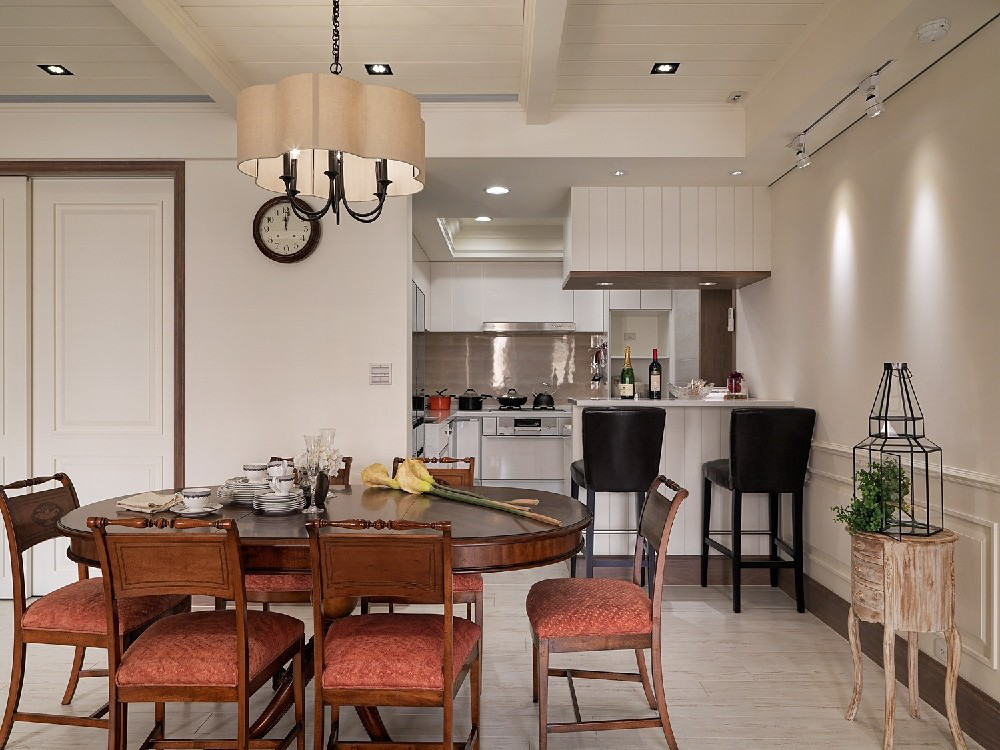

In [64]:
Image.open(sim_res[6][0])

In [1]:
from sklearn.model_selection import ShuffleSplit

In [3]:
rs = ShuffleSplit(n_splits=2, test_size=1000, random_state=0)

In [7]:
rs.get_n_splits(fp_hashes)

2

In [9]:
next(rs.split(fp_hashes))

(array([   56, 30343, 29564, ..., 42613, 43567, 68268]),
 array([104465,  77732,  84505,  64076,  55799,  33490, 102252,  83709,
         12033,  73025,  38818,  91427,  33500,  59472,  40760,  41804,
          4513, 106176,  83631,  17785, 107970,  48607,  25359,  79214,
         23640,  67818,  16683,  36442, 113349,  12409,  23153,  12141,
         45313,  86027,  37158,  34755, 104708,  68682,  76217,  65337,
         88375,  68381,  62798,  88258,   2158,   2020,  33681,  17469,
            17, 100110,  10069,  97783,  52768,  47522,  59341,  86563,
         19385,  56873,  86807,  43492,  28352,  96022,  27560,  63226,
         46853,  65729,   1712,  66242,  76910, 112898,   6055,  52058,
         87608,  74330,  11429,  79912,  35690, 103013,  42675,  72891,
         14928,  74384,  88579,  24219,  67615,  65051,   1531,  10106,
         85975,  82840,  22077, 102831,  74344,  50471,   9679,  84569,
         10622,  12761,  99854,  60365,  95632,  29840,  29220,  10601,
       

In [12]:
dict_data = {'a': 1, 'b': 1}

In [15]:
import json

In [16]:
jsobj = json.dumps(dict_data)

In [20]:
with open('json.json', 'w') as f:
    f.write(jsobj)

In [25]:
with open('json.json', 'r') as f:
    read_json = json.loads(f.readlines()[0])

In [28]:
read_json['a']

1